In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
data_file = pd.read_csv("Dataset.csv")

# ''' Showing the New Customer Acquisition on a trend line. 
   # During which period did new customers grow the most. 
   # During which period did it flatten?'''

In [3]:
data_file["Order Date"] = data_file["Order Date"].apply(lambda x:datetime.datetime.strptime(x,'%d-%m-%Y'))

In [4]:
def ye(input_date):
    y = input_date.year
    return y

In [5]:
data_file["year"] = data_file["Order Date"].apply(ye)

In [6]:
period = data_file.groupby("year")

<AxesSubplot:title={'center':'Year Wise'}, xlabel='year'>

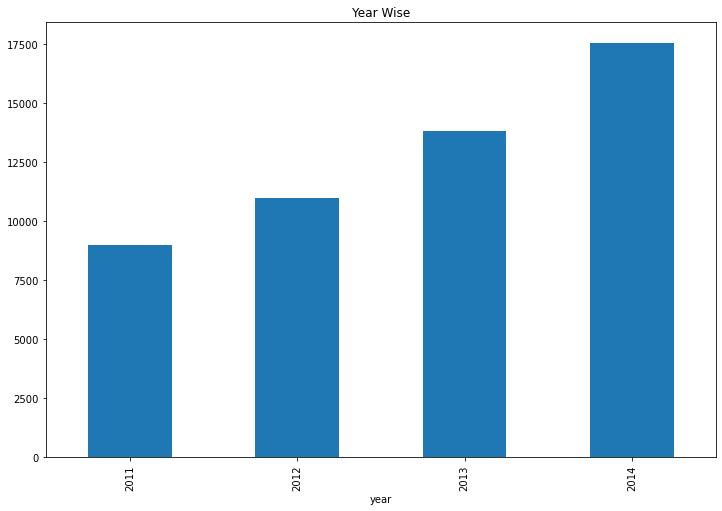

In [7]:
period.size().plot(kind = 'bar', title = "Year Wise", figsize = (12,8))

In [8]:
def mo(input_datee):
    m = input_datee.month
    return m
data_file["month"] = data_file["Order Date"].apply(mo)

In [9]:
monthly = data_file.groupby("month")

<AxesSubplot:title={'center':'Month Wise Through Four Years'}, xlabel='month'>

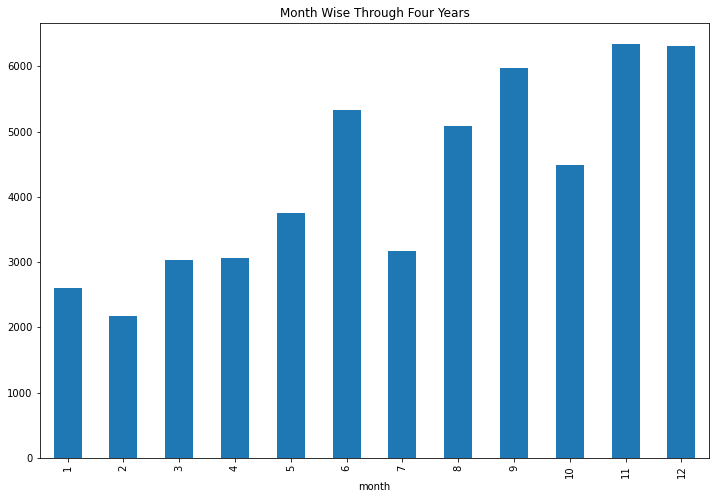

In [10]:
monthly.size().plot(kind = 'bar', title = "Month Wise Through Four Years", figsize = (12,8))

In [11]:
time_period = data_file.groupby(["year","month"])

<AxesSubplot:title={'center':'Year-Month'}, xlabel='year'>

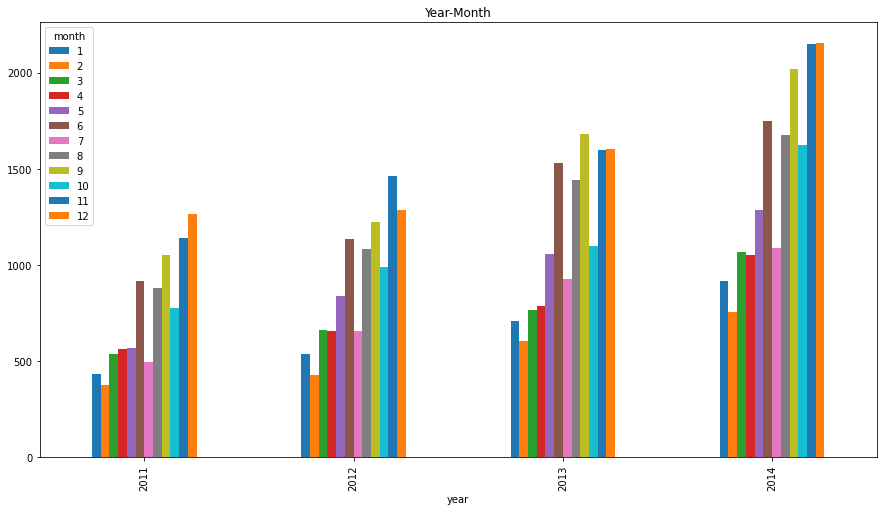

In [12]:
time_period.size().unstack().plot(kind = 'bar',title="Year-Month",figsize=(15,8))

In [13]:
time_period = data_file.groupby(["month","year"])

<AxesSubplot:title={'center':'Month - Year'}, xlabel='month'>

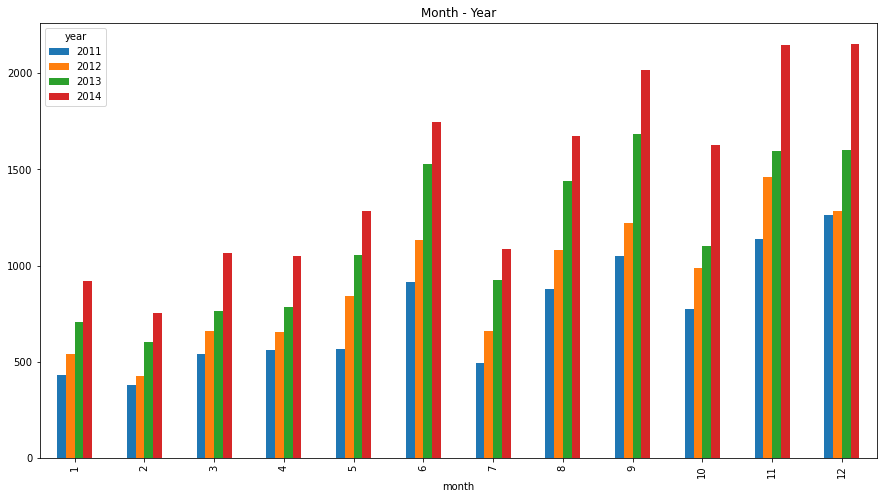

In [14]:
time_period.size().unstack().plot(kind = 'bar',title="Month - Year",figsize=(15,8))

# 2.	The business wants to calculate profitability for business day.

# They want to know how many days each month has been profitable and unprofitable.



In [15]:
def day(input_date):
    d = input_date.day
    return d

In [16]:
data_file["day"] = data_file["Order Date"].apply(day)

In [17]:
def po(input_profit):
    m = input_profit
    if m >= 0:
        return 1
    else:
        return 0
data_file["profit_type"] = data_file["Profit"].apply(po)

In [18]:
profit_stat = data_file.groupby(["month","year","profit_type"])

<AxesSubplot:title={'center':'PROFIT STATs'}, xlabel='month,year'>

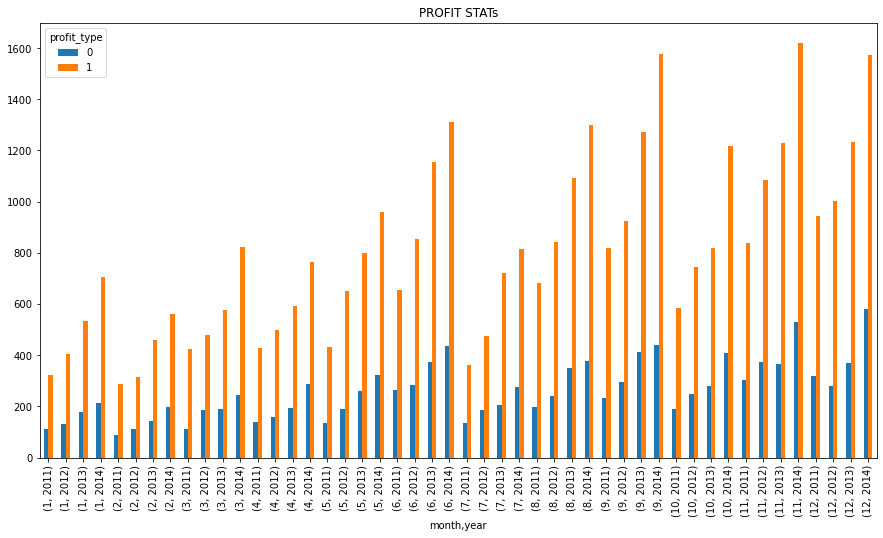

In [19]:
profit_stat.size().unstack().plot(kind = 'bar',title="PROFIT STATs",figsize=(15,8))

# 3.	Which are the top 5 countries by sales.

# The strategy team feels that if you remove the bottom 10 percentile it will change the top 5 countries ranking. Validate this.


In [46]:
#BEFORE REMOVING BOTTOM 10 PERCENTILE....

Text(0.5, 1.0, 'top 5 countries by sales')

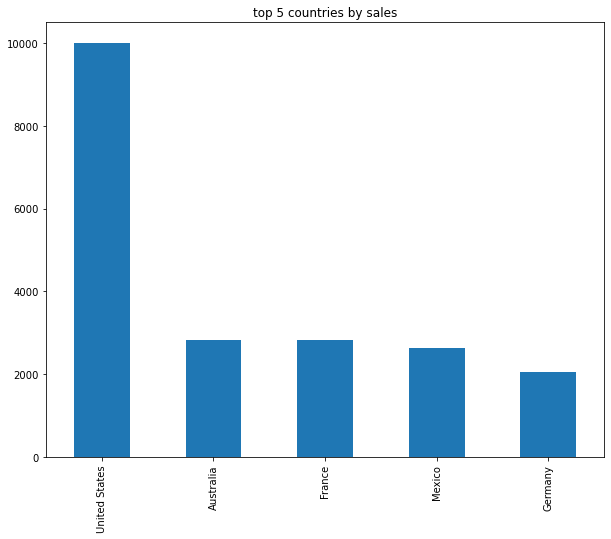

In [47]:
top_5 = data_file["Country"].value_counts()[:5]
top_5.plot(kind = 'bar', figsize = (10,8))
plt.title("top 5 countries by sales")

In [ ]:
#AFTER REMOVING BOTTOM 10 PERCENTILE